In [1]:
pwd

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%notebook inline

In [3]:
df = pd.read_csv('Amazon_reviews.csv')

In [4]:
df.head()

,Unnamed: 0,company_name,product_name,reviews,ratings
0,0,Apple,New Apple iPhone 11 (64GB) - Black,Please do not buy expensive product like iphon...,1.0
1,1,Apple,New Apple iPhone 11 (64GB) - Black,Bought the mobile from appario retail ltd. Mob...,1.0
2,2,Apple,New Apple iPhone 11 (64GB) - Black,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0
3,3,Apple,New Apple iPhone 11 (64GB) - Black,My Phone is Producing Too Much Heat Even Didn’...,1.0
4,4,Apple,New Apple iPhone 11 (64GB) - Black,This is a big scam. I received the iphone 11 y...,1.0


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [6]:
df.head()

,company_name,product_name,reviews,ratings
0,Apple,New Apple iPhone 11 (64GB) - Black,Please do not buy expensive product like iphon...,1.0
1,Apple,New Apple iPhone 11 (64GB) - Black,Bought the mobile from appario retail ltd. Mob...,1.0
2,Apple,New Apple iPhone 11 (64GB) - Black,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0
3,Apple,New Apple iPhone 11 (64GB) - Black,My Phone is Producing Too Much Heat Even Didn’...,1.0
4,Apple,New Apple iPhone 11 (64GB) - Black,This is a big scam. I received the iphone 11 y...,1.0


In [7]:
df.shape

(13890, 4)

In [8]:
df.dtypes

company_name     object
product_name     object
reviews          object
ratings         float64
dtype: object

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(13890, 4)

In [11]:
df = df[df['ratings'] != 3.0]

In [12]:
df.shape

(12625, 4)

In [13]:
df['positively rated'] = np.where(df['ratings'] > 3.0, 1, 0)

In [14]:
df.head(10)

,company_name,product_name,reviews,ratings,positively rated
0,Apple,New Apple iPhone 11 (64GB) - Black,Please do not buy expensive product like iphon...,1.0,0
1,Apple,New Apple iPhone 11 (64GB) - Black,Bought the mobile from appario retail ltd. Mob...,1.0,0
2,Apple,New Apple iPhone 11 (64GB) - Black,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0,1
3,Apple,New Apple iPhone 11 (64GB) - Black,My Phone is Producing Too Much Heat Even Didn’...,1.0,0
4,Apple,New Apple iPhone 11 (64GB) - Black,This is a big scam. I received the iphone 11 y...,1.0,0
5,Apple,New Apple iPhone 11 (64GB) - Black,The iPhone design is good and the camera quali...,5.0,1
6,Apple,New Apple iPhone 11 (64GB) - Black,"Defective product,got heat up within 5 minutes...",1.0,0
7,Apple,New Apple iPhone 11 (64GB) - Black,The product i got was defective . The face id ...,1.0,0
8,Apple,New Apple iPhone 11 (64GB) - Black,"Just after i switched it on, it started produc...",1.0,0
9,Apple,New Apple iPhone 11 (64GB) - Black,Provided with defective product .Struggling fo...,1.0,0


In [15]:
df['positively rated'].mean()

0.7619009900990099

In [16]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [17]:
import re

In [18]:
df['reviews']= df['reviews'].apply(lambda x: re.sub(r"http\S+", "", x))

In [19]:
def contractions(s):
    s = re.sub(r"won’t", "will not",s)
    s = re.sub(r"would’t", "would not",s)
    s = re.sub(r"could’t", "could not",s)
    s = re.sub(r"\’d", "would",s)
    s = re.sub(r"can\’t", "can not",s)
    s = re.sub(r"n\’t", "not", s)
    s= re.sub(r"\’re", "are", s)
    s = re.sub(r"\’s", "is", s)
    s = re.sub(r"\’ll", "will", s)
    s = re.sub(r"\’t", "not", s)
    s = re.sub(r"\’ve", "have", s)
    s = re.sub(r"\’m", "am", s)
    return s


In [20]:
df['reviews']= df['reviews'].apply(lambda x:contractions(x))

In [21]:
df['reviews']= df['reviews'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [22]:
df['reviews']= df['reviews'].apply(lambda x: re.sub(' +', ' ', x))

In [23]:
for x in df['reviews'][:2]:
    print(x)

please do not buy expensive product like iphone from amazon i had very bad exp the charger cord was missing and had sound quality issues amazon initial told charger does nt come in box and when i challenged it they asked reimburse the cord amount but i requested a replacement after some days they called me and informed that they dont take responsibility of missing items and day replacement policy they dont follow you can read the email conversation attached here where i mentioned every thing i have the call recordings as well at last they denied the phone replacement and even to provide the missing cord for any damage or quality issues they said amazon is not responsible 
bought the mobile from appario retail ltd mobile is heating up within seconds and also camera modes arenot working properly particularly in portrait mode the stage light and mono options arenot working properly i raised the same to apple customer care they confirmed that its not software issue but the amazon customer 

In [24]:
df.dropna(inplace=True)

In [25]:
df.tail()

,company_name,product_name,reviews,ratings,positively rated
13885,Safari,SAFARI 15 Ltrs Denim Blue Casual/School/Colleg...,amazing at this price,5.0,1
13886,Safari,SAFARI 15 Ltrs Denim Blue Casual/School/Colleg...,light weight and very sort,4.0,1
13887,Safari,SAFARI 15 Ltrs Denim Blue Casual/School/Colleg...,good,4.0,1
13888,Safari,SAFARI 15 Ltrs Denim Blue Casual/School/Colleg...,good looking,5.0,1
13889,Safari,SAFARI 15 Ltrs Denim Blue Casual/School/Colleg...,good,5.0,1


In [26]:
positives = len(df[df['positively rated'] == 1])
negatives = len(df[df['positively rated'] == 0])
print(positives, negatives)

9619 3006


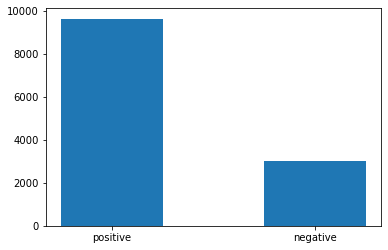

In [27]:
plt.figure()
langs = ['positive', 'negative']
data = [positives, negatives]
plt.bar(langs, data, width=0.5)
plt.show()

In [28]:
vocab = []
for x in df['reviews']:
    lst = x.split()
    for y in lst:
        vocab.append(y)

In [29]:
from wordcloud import WordCloud, STOPWORDS 

In [30]:
stopwords = set(STOPWORDS)
words = " ".join(vocab)

In [31]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words)

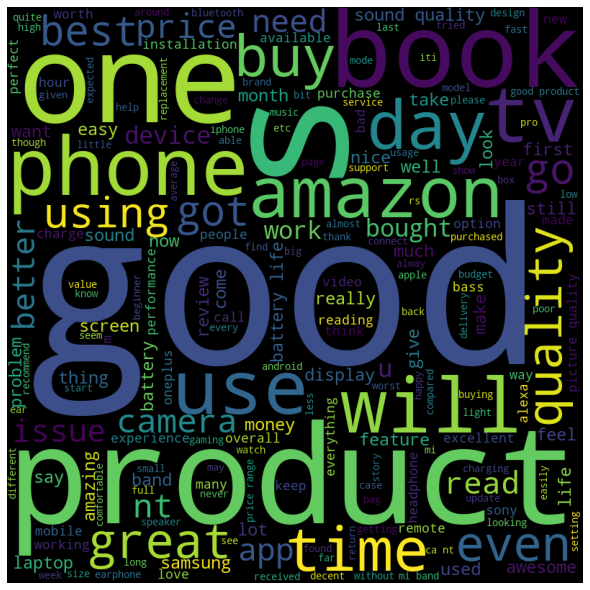

In [32]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [33]:
X = df['reviews']
y = df['positively rated']

In [34]:
X.shape, y.shape

((12625,), (12625,))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify = y, random_state = 30)

In [36]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((9468,), (3157,), (9468,), (3157,))

In [37]:
print('X_train first entry:\n\n', X_train.iloc[0])

X_train first entry:

 must read for everyoneit is very helpful to understand what mind really is and how we should liberate it 


In [38]:
Y_train.iloc[0]

1

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [40]:
vect = TfidfVectorizer(min_df=7, ngram_range=(1, 1)).fit(X_train)
len(vect.get_feature_names())

3803

In [41]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.66      0.76       752
           1       0.90      0.97      0.94      2405

    accuracy                           0.90      3157
   macro avg       0.89      0.82      0.85      3157
weighted avg       0.90      0.90      0.89      3157



In [42]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['psychologist' 'firing' 'playpause' 'allows' 'remind' 'ecosystem'
 'demanding' 'physically' 'blessing' 'swipe']

Largest tfidf: 
['satisfactory' 'worst' 'readable' 'one' 'brilliant' 'on' 'unputdownable'
 'missing' 'okay' 'ok']


In [43]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'worst' 'poor' 'waste' 'disappointed' 'nt' 'bad' 'return'
 'replacement' 'defective']

Largest Coefs: 
['good' 'great' 'best' 'excellent' 'awesome' 'nice' 'amazing' 'for' 'easy'
 'life']


In [44]:
print(model.predict(vect.transform(['very bad experience, delivery was not on time'])))

[0]


In [45]:
print(model.predict(vect.transform(['great product, packaging was good and exact on time.'])))

[1]


In [46]:
import pickle

In [47]:
pickle.dump(model, open('model_v1.pkl','wb'))

In [48]:
model = pickle.load(open('model_v1.pkl','rb'))

In [49]:
pickle.dump(vect, open('vec.pkl','wb'))

In [50]:
vec1 =  pickle.load(open('vec.pkl','rb'))